In [1]:
import pandas as pd
pd.options.display.max_columns=100

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter,FuncFormatter
plt.style.use('ggplot')
import plotly.express as px

import kaggle
import os

path=r"C:\Users\berid\python\nba_shots_project"

import warnings
warnings.filterwarnings('ignore')

kaggle.api.dataset_download_files("mexwell/nba-shots",path=os.path.join(path,'data_files'),unzip=True,quiet=False)

df=pd.DataFrame()

files=os.listdir(os.path.join(path,'data_files'))
for i,file in enumerate(files,start=1):
    file_path=os.path.join(path,'data_files',file)
    data=pd.read_csv(file_path)
    df=pd.concat([df,data],ignore_index=True)

    print(f'{i}/{len(files)}',end='\r')

df.to_csv(os.path.join(path,'data_files','all_seasons.csv'),index=False)

In [2]:
df=pd.read_csv(os.path.join(path,'data_files','all_seasons.csv'))

df=df[df.duplicated()==False]

In [3]:
g=df.groupby(['GAME_ID','HOME_TEAM','AWAY_TEAM'])['GAME_ID'].nunique().reset_index(name='Count')
g.groupby('GAME_ID').filter(lambda x : x['HOME_TEAM'].count()!=1)

df=df[df['GAME_ID']!=22000000]

In [4]:
df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,POR,LAL,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,POR,LAL,Made Shot,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,POR,LAL,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,POR,LAL,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,POR,LAL,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231257,2024,2023-24,1610612737,Atlanta Hawks,203992,Bogdan Bogdanovic,G,SG,12-08-2023,22301218,PHI,ATL,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,11.9,29.85,27,4,0,48
4231258,2024,2023-24,1610612737,Atlanta Hawks,203991,Clint Capela,C,C,12-08-2023,22301218,PHI,ATL,Missed Shot,False,Tip Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,8-16 ft.,1.6,14.25,9,4,0,45
4231259,2024,2023-24,1610612737,Atlanta Hawks,203991,Clint Capela,C,C,12-08-2023,22301218,PHI,ATL,Made Shot,True,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,Less Than 8 ft.,0.6,9.75,4,4,0,44
4231260,2024,2023-24,1610612737,Atlanta Hawks,1627749,Dejounte Murray,G,SG,12-08-2023,22301218,PHI,ATL,Made Shot,True,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-1.7,34.55,29,4,0,37


In [5]:
df['GAME_DATE']=pd.to_datetime(df['GAME_DATE'])

In [6]:
df.isna().sum()[df.isna().sum()>0]

POSITION_GROUP    7930
POSITION          7930
dtype: int64

In [7]:
df.nunique()

SEASON_1             21
SEASON_2             21
TEAM_ID              30
TEAM_NAME            36
PLAYER_ID          2162
PLAYER_NAME        2164
POSITION_GROUP        3
POSITION             17
GAME_DATE          3353
GAME_ID           25222
HOME_TEAM            34
AWAY_TEAM            34
EVENT_TYPE            2
SHOT_MADE             2
ACTION_TYPE          70
SHOT_TYPE             2
BASIC_ZONE            7
ZONE_NAME             6
ZONE_ABB              6
ZONE_RANGE            5
LOC_X               951
LOC_Y              1694
SHOT_DISTANCE        90
QUARTER               8
MINS_LEFT            13
SECS_LEFT            60
dtype: int64

In [8]:
import numpy as np

outcome_points = np.where(
    (df['SHOT_TYPE'] == "3PT Field Goal") & (df['SHOT_MADE']), 3,
    np.where((df['SHOT_TYPE'] == "2PT Field Goal") & (df['SHOT_MADE']), 2, 0)
)
df.insert(df.columns.get_loc('SHOT_TYPE')+1,'POINTS',outcome_points)

(0.4, 0.48)

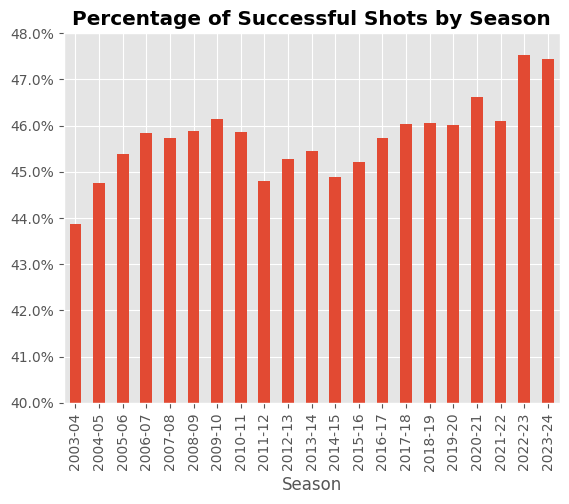

In [9]:
grouped=df.groupby([df['SEASON_2'], 'SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby('SEASON_2')['Count'].transform(lambda x:x/x.sum())
grouped=grouped[grouped['SHOT_MADE']].set_index('SEASON_2')['Percentage']

grouped.plot.bar()
plt.xlabel('Season')
plt.title('Percentage of Successful Shots by Season',fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylim(0.4,0.48)

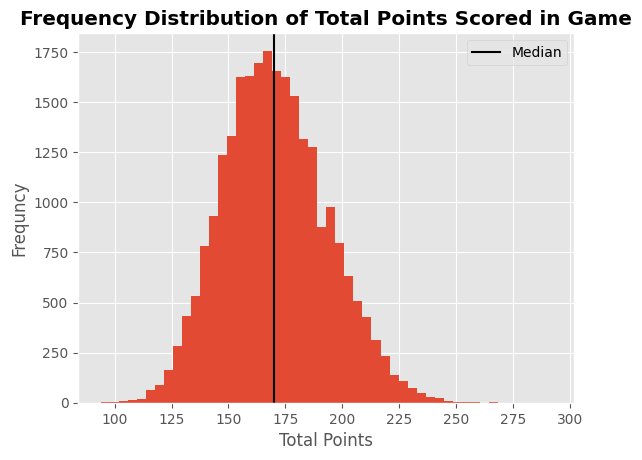

In [10]:
g=df.groupby('GAME_ID')['POINTS'].sum()
median=g.median()

ax=g.hist(bins=50)
ax.axvline(median,color='Black',label='Median')
ax.set_title('Frequency Distribution of Total Points Scored in Game',fontweight='bold')
ax.set_xlabel('Total Points')
ax.set_ylabel('Frequncy')
ax.legend()
plt.show()

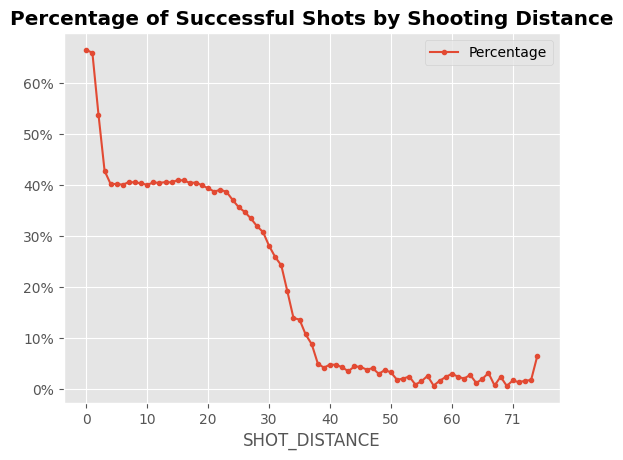

In [11]:
grouped=df.groupby(['SHOT_DISTANCE', 'SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby('SHOT_DISTANCE')['Count'].transform(lambda x:x/x.sum())
grouped=grouped[grouped['SHOT_MADE']]
grouped['SHOT_DISTANCE']=grouped['SHOT_DISTANCE'].astype(str)

grouped.plot.line(x='SHOT_DISTANCE',y='Percentage',marker='.')
plt.title('Percentage of Successful Shots by Shooting Distance',fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.show()

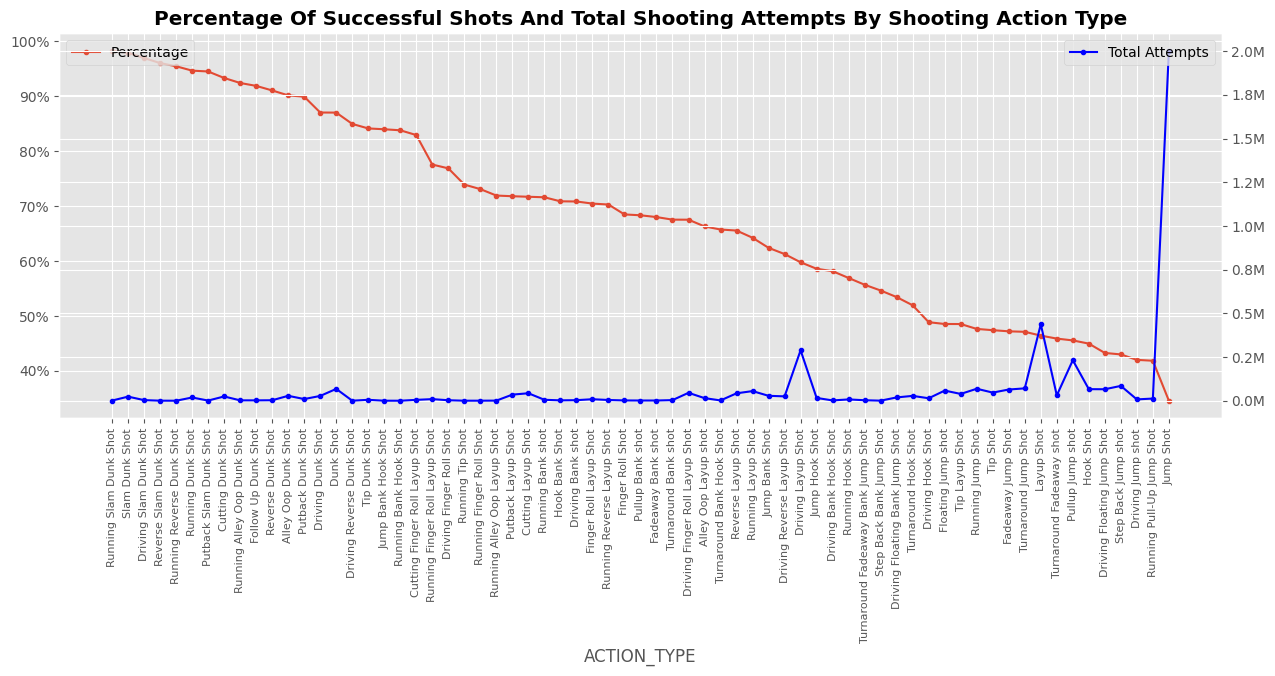

In [12]:
grouped=df.groupby(['ACTION_TYPE', 'SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby('ACTION_TYPE')['Count'].transform(lambda x:x/x.sum())
grouped['Total Attempts']=grouped.groupby('ACTION_TYPE')['Count'].transform(lambda x:x.sum())
grouped=grouped[grouped['SHOT_MADE']]
grouped=grouped.sort_values('Percentage',ascending=False)
grouped['ACTION_TYPE']=grouped['ACTION_TYPE'].astype(str)
grouped=grouped[grouped['Count']>=100]

ax=grouped.plot.line(x='ACTION_TYPE',y='Percentage',marker='.',figsize=(15,5))
ax2=ax.twinx()
grouped.plot.line(ax=ax2,x='ACTION_TYPE',y='Total Attempts',marker='.',color='Blue')

plt.title('Percentage Of Successful Shots And Total Shooting Attempts By Shooting Action Type',fontweight='bold')

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.set_xticks(range(len(grouped['ACTION_TYPE'])))
ax.set_xticklabels(grouped['ACTION_TYPE'],rotation=90,size=8)
ax.legend(loc='upper left')

def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax2.legend(loc='upper right')
#ax2.set_yscale('log')


plt.show()

In [13]:
    # jump shots are the most diffuclt to pull off

In [14]:
seconds_passed=np.where(
        df['QUARTER']<=4, (df['QUARTER']-1)*12*60+12*60-df['MINS_LEFT']*60-df['SECS_LEFT'],
        np.where(df['QUARTER']>=5, 4*12*60+(df['QUARTER']-4-1)*5*60+ 5*60-df['MINS_LEFT']*60-df['SECS_LEFT'],None
             ))

df['SECONDS_PASSED']=seconds_passed

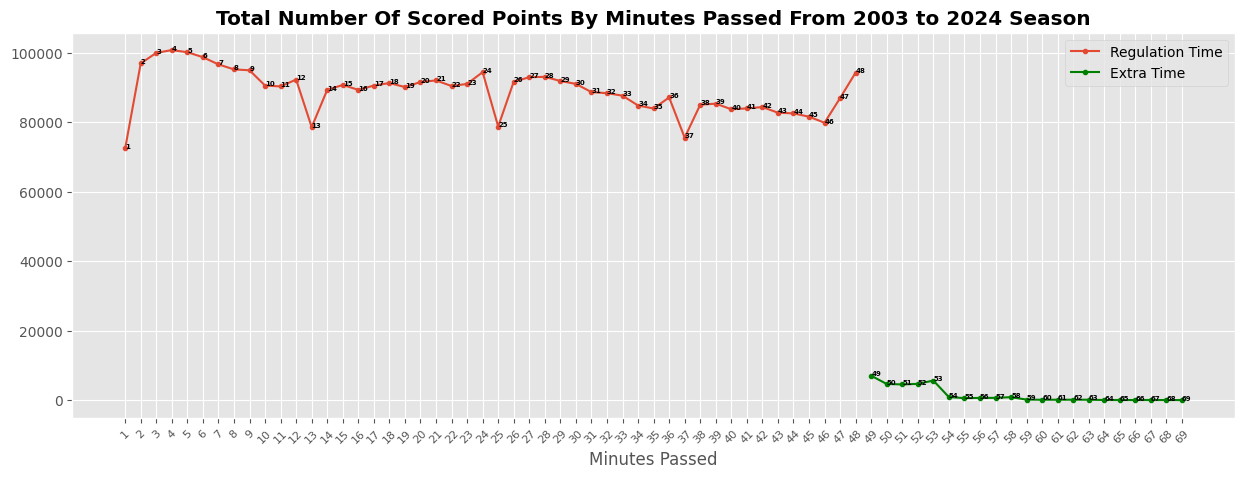

In [15]:
grouped=df.groupby((df['SECONDS_PASSED']/60+1).astype(int))['POINTS'].sum()


plt.figure(figsize=(15,5))
grouped[grouped.index<=48].plot(marker='.',label='Regulation Time')
grouped[grouped.index>48].plot(marker='.',color='Green',label='Extra Time')
plt.title('Total Number Of Scored Points By Minutes Passed From 2003 to 2024 Season',fontweight='bold')
plt.xlabel('Minutes Passed')
plt.xticks(grouped.index,rotation=45,size=8)
plt.legend()
for i in range(0,len(grouped),1):
    plt.text(grouped.index[i], grouped.values[i], str(grouped.index[i]), fontweight='bold', size=5)
plt.show()

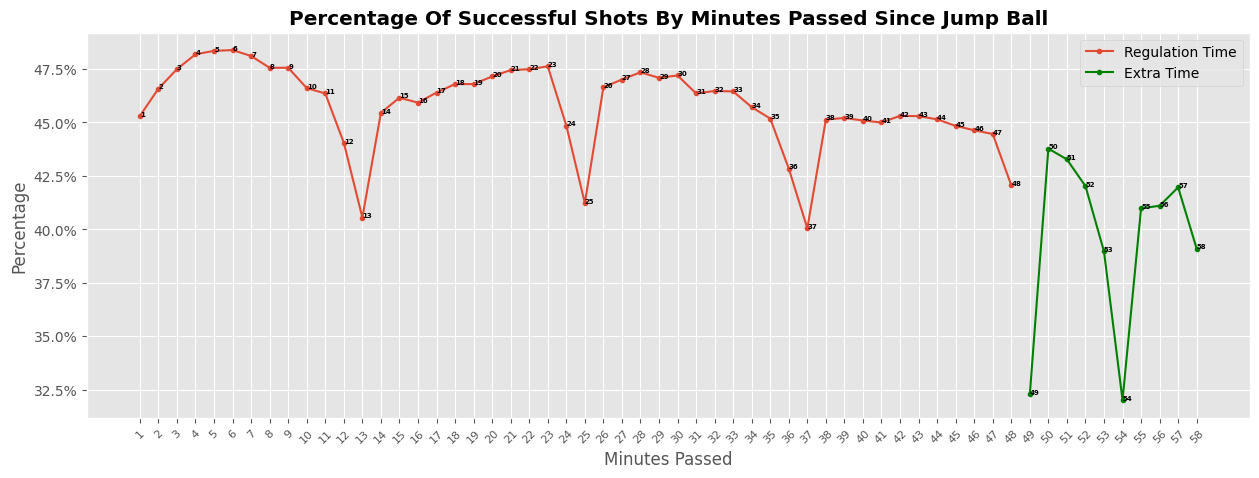

In [16]:
grouped=df.groupby([(df['SECONDS_PASSED']/60+1).astype(int), 'SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby('SECONDS_PASSED')['Count'].transform(lambda x:x/x.sum())
grouped=grouped[grouped['SHOT_MADE']]
grouped=grouped[grouped['Count']>=100]
grouped=grouped[['SECONDS_PASSED','Percentage']].set_index('SECONDS_PASSED')['Percentage']


plt.figure(figsize=(15,5))
grouped[grouped.index<=48].plot(marker='.',label='Regulation Time')
grouped[grouped.index>48].plot(marker='.',color='Green',label='Extra Time')
plt.title('Percentage Of Successful Shots By Minutes Passed Since Jump Ball',fontweight='bold')
plt.xlabel('Minutes Passed')
plt.xticks(grouped.index,rotation=45,size=8)
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.legend()
for i in range(0,len(grouped),1):
    plt.text(grouped.index[i], grouped.values[i], str(grouped.index[i]), fontweight='bold', size=5)

plt.show()

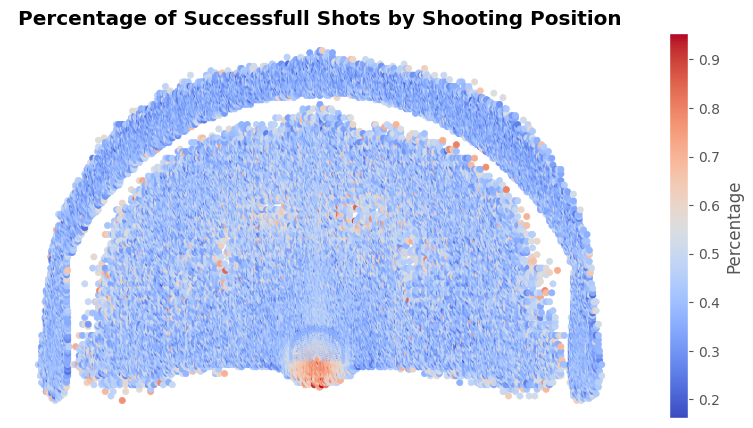

In [23]:
grouped=df.groupby([df['LOC_X'].round(1),df['LOC_Y'].round(1),'SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby(['LOC_X','LOC_Y'])['Count'].transform(lambda x:x/x.sum())
grouped=grouped[grouped['SHOT_MADE']]

grouped[grouped['Count']>=10].plot.scatter(x='LOC_X',y='LOC_Y',c='Percentage',cmap='coolwarm',figsize=(10,5))
plt.title('Percentage of Successfull Shots by Shooting Position',fontweight='bold')
plt.axis('off')
plt.show()

In [46]:
grouped=df.groupby(['SEASON_1','PLAYER_ID','SHOT_MADE']).size().reset_index(name='Count')
grouped['Percentage']=grouped.groupby(['SEASON_1','PLAYER_ID'])['Count'].transform(lambda x:x/x.sum())
grouped=grouped[grouped['SHOT_MADE']]
grouped=grouped[grouped['Count']>=50]
grouped=grouped.sort_values(['PLAYER_ID','SEASON_1'])
grouped['Change']=grouped.groupby('PLAYER_ID')['Percentage'].apply(lambda x: x-x.shift(1)).values

grouped=grouped.merge(df[['PLAYER_ID','PLAYER_NAME']].drop_duplicates(),how='left',on='PLAYER_ID')

grouped=grouped.groupby('PLAYER_ID').filter(lambda x:x['SEASON_1'].count()>5)

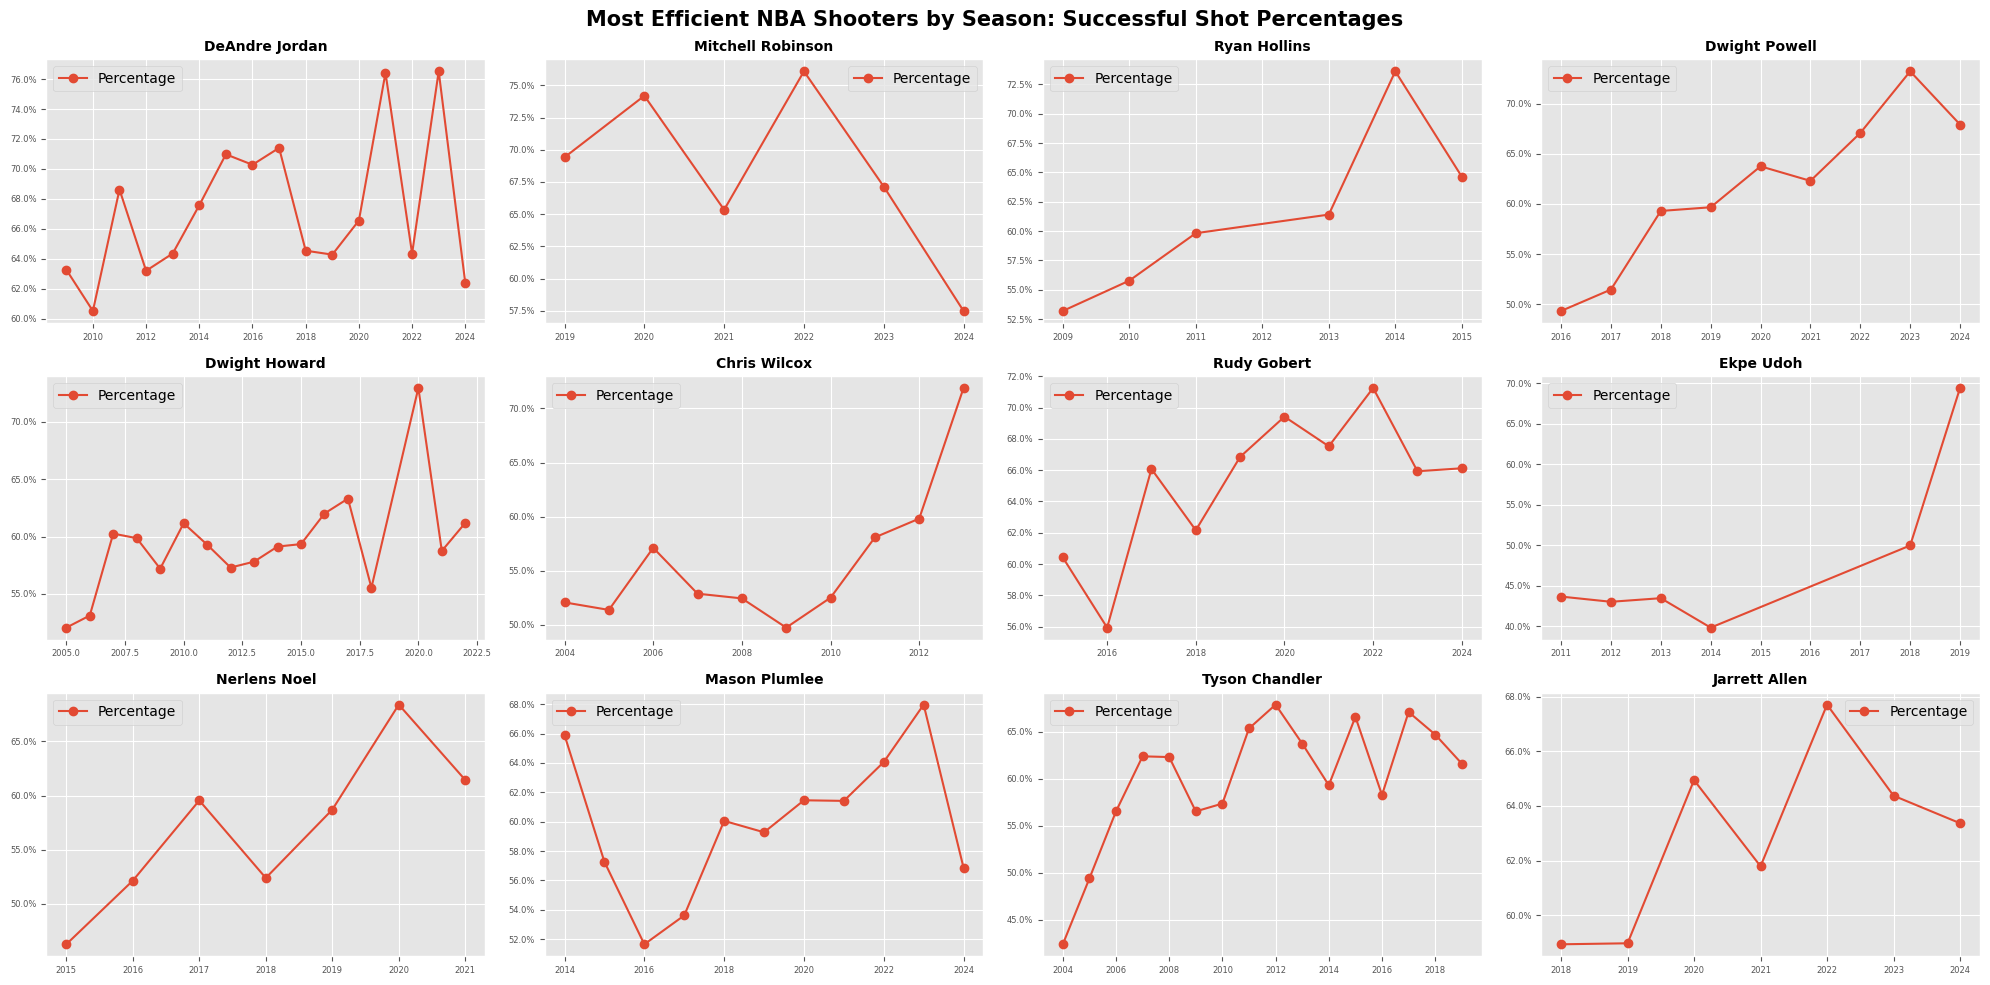

In [62]:
best_shooters=grouped.sort_values('Percentage',ascending=False)['PLAYER_ID'].unique()[:12]

fig,axes=plt.subplots(3,4,figsize=(20,10))

for best_shooter, ax in zip(best_shooters,axes.ravel()):
    filtered=grouped[grouped['PLAYER_ID']==best_shooter]

    filtered.plot.line(ax=ax,x='SEASON_1',y='Percentage',fontsize=6,marker='o')
    ax.set_xlabel(None)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(filtered['PLAYER_NAME'].unique()[0],fontweight='bold',size=10)


plt.suptitle('Most Efficient NBA Shooters by Season: Successful Shot Percentages',fontweight='bold',size=15)
plt.subplots_adjust(top=0.99)
plt.tight_layout()
plt.show()